# __Premier pas en $FFTW$__

Pour pouvoir utiliser $FFTW$, il est nécéssaire d'installer le module à l'aide de l'outil $pip$. La commande à utiliser (dans le terminal)
est la suivante :

$$pip \quad install \quad pyFFTW$$

Il nous suffit ensuite d'importer le module.

In [1]:
from numpy import *
import pyfftw
from IPython.display import display, Markdown, Math
from matplotlib.pyplot import *

__FFT à 1 dimension__

In [2]:
TYPE = "complex128"
N = 128
a = pyfftw.empty_aligned(N, dtype=TYPE) 
b = pyfftw.empty_aligned(N, dtype=TYPE)

$pyfftw.empty\_aligned(N, dtype=TYPE)$ renvoie un tableau de taille $N$ de nombres aléatoires. Ces nombres sont aléatoires et devront donc être précisés plus tard.

On dit maintenant au programme que la bonne transformée de Fourier sera stockée dans $b$ et cette transformation sera appellée $fft\_object$. 

In [3]:
fft_object = pyfftw.FFTW(a, b)

On crée à présent la transformée de Fourier inverse qui prendra les données de $b$, 
fera la transformée inverse et stockera les nouvelles données dans $c$.

In [4]:
c = pyfftw.empty_aligned(N, dtype=TYPE)

ifft_object = pyfftw.FFTW(b, c, direction='FFTW_BACKWARD')

On rempli maintenant la liste $a$ avec les données qui nous interessent. 
Pour tester le programme, nous prendrons dans un premier temps des valeurs aléatoires.

In [5]:
ar, ai = random.randn(2, N)
a[:] = ar + 1j*ai*0  #partie imaginaire à 0

On appelle à présent les transformations générales définies plus haut pour les 
appliquer dans le cas particulier des données aléatoires de $a$ qui 
viennent d\'être implémentées.

In [6]:
ffta=fft_object()
ifft_ = ifft_object() 

Vérifions à présent que les transformées inverses correspondent bien 
aux données de bases dans la limite de l'erreur $rtol$.

In [7]:
print( allclose(ifft_,c, rtol=1.e-15) )
print( allclose(a,c, rtol=1.e-13) )

True
True


La première commande est en réalité triviale en sachant que $ifft\_$ et $c$ sont le même objet. On peut le prouver grace à la commande suivante :

In [8]:
ifft_ is c

True

Pour que cela soit plus visuel, traçons les données de $a$ à coté de celles de $c$ puis celles de $b$ à coté de celles de $ffta$ :

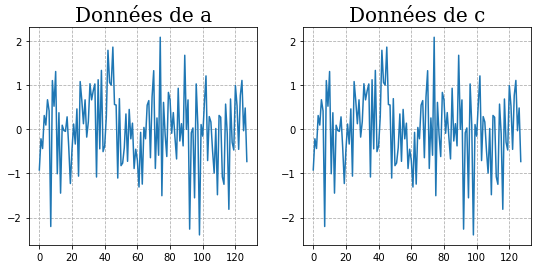

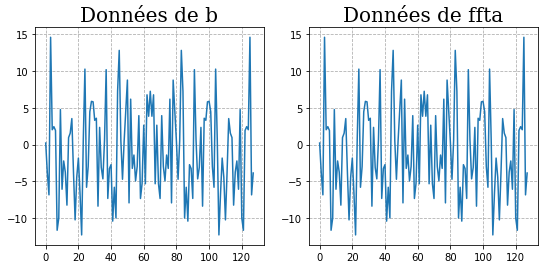

In [9]:
T=[i for i in range(len(a))]

fig = figure(1, figsize=(9, 4))

subplot(121)

plot(T,a.real)
title('Données de a',family='serif',size=20)
grid(True,linestyle='--')


subplot(122)

plot(T,c.real)
title('Données de c',family='serif',size=20)
grid(True,linestyle='--')
show()


fig = figure(1, figsize=(9, 4))
subplot(121)

plot(T,b.real)

title('Données de b',family='serif',size=20)
grid(True,linestyle='--')
subplot(122)

plot(T,ffta.real)
title('Données de ffta',family='serif',size=20)
grid(True,linestyle='--')
show()


# __Débruitage d'un signal 1D avec $FFTW$__

In [10]:
x=linspace(0,6*pi,N)

In [11]:
for k in range(len(a)) :
    a[k]=sin(x[k])+sin(2*x[k])+0.1*ar[k] +1j*0

In [12]:
b=fft_object()
ifft_ = ifft_object() 

In [13]:
print( np.allclose(ifft_,c, rtol=1.e-15) )
print( np.allclose(a,c, rtol=1.e-13) )

True
True


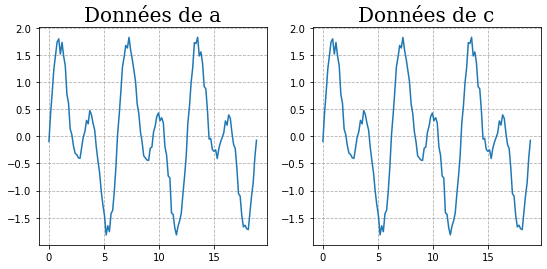

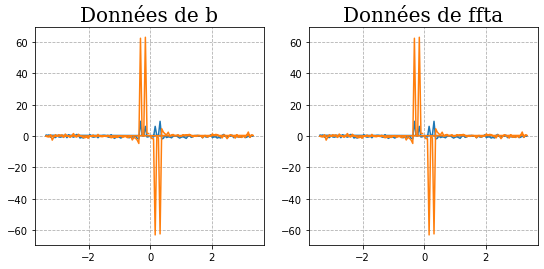

In [14]:
fig = figure(1, figsize=(9, 4))

n=a.size
freq=fft.fftfreq(n,6*pi/N)

subplot(121)

plot(x,a.real)
title('Données de a',family='serif',size=20)
grid(True,linestyle='--')


subplot(122)

plot(x,c.real)
title('Données de c',family='serif',size=20)
grid(True,linestyle='--')
show()


fig = figure(1, figsize=(9, 4))
subplot(121)

plot(freq,b.real)

plot(freq,b.imag)
title('Données de b',family='serif',size=20)
grid(True,linestyle='--')
subplot(122)

plot(freq,ffta.real)
plot(freq,ffta.imag)
title('Données de ffta',family='serif',size=20)
grid(True,linestyle='--')
show()

In [15]:
moyb=0
ini=0
for k in range(len(b)):
    ini+=b[k].real
moyb=ini/len(b)
ecty=std(b.real)


In [16]:
moyb

-0.092306339822423

In [17]:
ecty

1.5704264545401647

In [18]:
pic=[]
for k in range(len(b)):
    if abs(b[k].real)>(moyb+2*ecty):
        pic.append(b[k])
    else :
        pic.append(0+1j*0)

In [19]:
b=pic

In [20]:
c= ifft_object(b) 

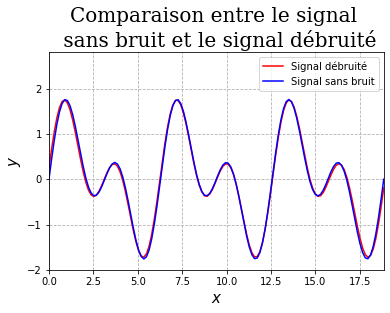

In [21]:
plot(x,c.real,label='Signal débruité',c='r')
plot(x,sin(x)+sin(2*x),label='Signal sans bruit',c='b')
grid(True, linestyle='--')
title('Comparaison entre le signal \n sans bruit et le signal débruité', family='serif', size=20)

xlabel('$x$',size=15)
ylabel('$y$',size=15)
xlim((0,6*pi))
ylim((-2,2.8))

legend()
savefig('comparaison_signal_1D_bruiT_DbruiT.pdf')
show()

# __Débruitage d'un signal 2D__

In [22]:
N  = 64
k1 = 2*np.pi 
TYPE = "complex128"
x,y = np.linspace( -np.pi, +np.pi, N, dtype=TYPE), np.linspace( -np.pi, np.pi,N, dtype=TYPE)

X,Y = np.meshgrid( x, y )

a2 = pyfftw.empty_aligned((N, N), dtype=TYPE)


b2 = pyfftw.empty_aligned((N,N), dtype=TYPE)

c2 = pyfftw.empty_aligned((N,N ), dtype=TYPE)

In [23]:
fft_object_2d = pyfftw.FFTW(a2, b2, axes=(0,1))

ifft_object_2d = pyfftw.FFTW(b2, c2, axes=(0,1), direction="FFTW_BACKWARD")

In [24]:
ar = random.randn(N, N)

In [25]:
a2[:] = np.sin( k1*X ) + np.cos( k1/2*Y ) +ar*0.5
if( TYPE == "complex128"):
    a2[:] += 1j*X*0

In [26]:
fft_2d = fft_object_2d() 

In [27]:
moyb2=zeros((N,2))
ecty2=zeros((N,2))


for k in range(len(b2[0])):
    moyb2[k][0]=mean(b2[k].real)
    ecty2[k][0]=std(b2[k].real)
    moyb2[k][1]=mean(b2[k].imag)
    ecty2[k][1]=std(b2[k].imag)


pic2=zeros((len(b2[0]),len(b2[1])),dtype=TYPE)
for k in range(len(b2[0])):
    for l in range(len(b2[1])):
        if abs(b2[k][l].real)>(moyb2[k][0]+4*ecty2[k][0]):
            pic2[k][l]=b2[k][l].real
        if abs(b2[k][l].imag)>(moyb2[k][1]+4*ecty2[k][1]):
            pic2[k][l]+=1j*b2[k][l].imag

            
b2=pic2

In [28]:
c2 = ifft_object_2d(b2) 

In [29]:
n2=a2.size
freq2=fft.fftfreq(n2,2*pi/N)

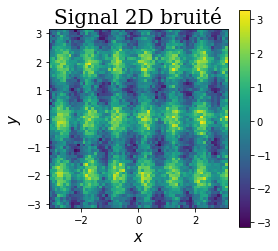

In [30]:
figures,ax = subplots(figsize=(4,4) )
bounds=(freq2.max(),freq2.min(),freq2.max(),freq2.min())
stretch = ( -np.pi, np.pi, -np.pi, +np.pi )
wavek = ( -N/(2*np.pi), N/(2*np.pi), -N/(2*np.pi), +N/(2*np.pi) )
im=ax.imshow( a2.real, extent=stretch )

ax.set_title('Signal 2D bruité',family='serif',size=20)
ax.set_xlabel('$x$',size=15)
ax.set_ylabel('$y$',size=15)

colorbar(im,ax=ax)

savefig('signal_2D_bruite.pdf')
show() 

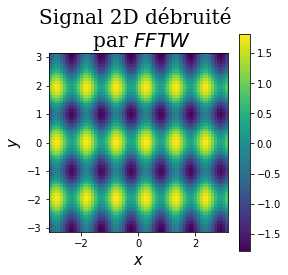

In [31]:
figures,ax = subplots(figsize=(4,4) )
bounds=(freq2.max(),freq2.min(),freq2.max(),freq2.min())
stretch = ( -np.pi, np.pi, -np.pi, +np.pi )
wavek = ( -N/(2*np.pi), N/(2*np.pi), -N/(2*np.pi), +N/(2*np.pi) )
im=ax.imshow(c2.real, extent=stretch)

ax.set_title('Signal 2D débruité \n par $FFTW$',family='serif',size=20)
ax.set_xlabel('$x$',size=15)
ax.set_ylabel('$y$',size=15)

colorbar(im,ax=ax)

savefig('signal_2D_debruite.pdf')
show() 

__Résolution de l'équation de Poisson__

L'équation de Poisson prend la forme générale :

$$
\Delta \phi = f(x,y)
$$

où $f(x,y)$ est une fonction à préciser et $\Delta$ est le laplacien. Cette équation prend donc à 2 dimensions la forme suivante :
$$\bigg(\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}\bigg)\phi = f(x,y)$$

Pour résoudre cette équation, nous allons dans un premier temps décomposer $\phi$ en série de Fourier :
$$\phi(x,y)=\sum_{i =1}^{\infty} \sum_{j =1}^{\infty} \phi_{ij}\sin(i\pi x)\sin(j\pi y)$$

Supposons à présent que nous souhaitons résoudre l'équation de Poisson sur un réseau 2D de $N_x\times N_y$ points. Dans cette hypothèse, l'équation différentielle prend la forme :
$$\phi_{i,j}=\bigg(\frac{\phi_{i+1,j}+\phi_{i-1,j}}{\Delta x²}+\frac{\phi_{i,j+1}+\phi_{i,j-1}}{\Delta y²}-f_{i,j}\bigg)\times \frac{1}{2}\bigg(\frac{1}{\Delta x^2}+\frac{1}{\Delta y^2}\bigg)^{-1}$$

En effet, en réécrivant les différentielles de l'équation de Poisson comme des différences finies, nous arrivons effectivement à cette expression pour $\phi_{i,j}$.

Dans cette formule, $\Delta x^2$ et $\Delta y^2$ représentent le pas du réseau respectivement selon $x$ et $y$.

https://hmf.enseeiht.fr/travaux/projnum/book/export/html/2329

__Nouvelle méthode plus simple__

D'une part nous avons besoin de connaître la tranformée de Fourier de la 
différentielle d'une fonction (en ayant bien sûr supposé que celle-ci existe).
Cette transformée s'exprime comme :

$$\mathcal{F}\bigg(\frac{\partial u}{\partial x_k}\bigg)=i \xi_k \hat{u}(\xi) $$

En supposant que cette relation peut être appliquée 2 fois, nous arrivons à :

$$\mathcal{F}\bigg(\frac{\partial^2 u}{\partial x_k^2}\bigg)= |\xi_k|^2 \hat{u}(\xi) $$

Et ainsi l'équation de Poisson $\Delta u =f$ prend la forme très simple dans l'espace de Fourier :

$$\hat{u}(\xi)=\frac{1}{|\xi|²}\hat{f}(\xi)$$

Définissons la fonction $f$ pour laquelle on souhaite résoudre l'équation de Poisson. Nous prendrons dans un premier 
temps $f(x,y)=1$ car nous connaissons la solution de l'équation de Poisson pour cette fonction.

In [32]:
def f(x,y):
    return cos(2*x)+sin(y) + 1j*0

def solu(x,y):
    return y*(1-y)*x*x*x

In [33]:
N  = 64
TYPE = "complex128"
x,y = linspace( 0, 1, N, dtype=TYPE), linspace( 0, 1,N, dtype=TYPE)

X,Y = meshgrid( x, y )

delx=abs((x.real.max()-x.real.min())/N)
dely=abs((y.real.max()-y.real.min())/N)

In [34]:
ap = pyfftw.empty_aligned( (N,N) , dtype=TYPE)

bp = pyfftw.empty_aligned( (N,N) , dtype=TYPE)

bbp = pyfftw.empty_aligned( (N,N) , dtype=TYPE)

cp = pyfftw.empty_aligned( (N,N) , dtype=TYPE)


In [35]:
fft_object_2dp = pyfftw.FFTW(ap, bp, axes=(0,1))

ifft_object_2dp = pyfftw.FFTW(bbp, cp, axes=(0,1), direction="FFTW_BACKWARD")

In [36]:
sol=zeros((N,N))

for k in range(N):
    for l in range(N):
        ap[k][l]=f(X[k][l].real,Y[k][l].real)
        sol[k][l]=solu(X[k][l].real,Y[k][l].real)
        

In [37]:
bp=fft_object_2dp()

In [38]:
np=ap.size
freqp=fft.fftfreq(np,(x.max()-x.min())/N)

In [39]:
freqp

array([ 0.      +0.j,  0.015625+0.j,  0.03125 +0.j, ..., -0.046875+0.j,
       -0.03125 +0.j, -0.015625+0.j])

In [40]:
for k in range(N):
    for l in range(N):
        if ((k==0 and l==0)):
            bbp[k][l]=bp[k][l]
        else :
            bbp[k][l]=bp[k][l]/(k**2+l**2)

In [41]:
cp=ifft_object_2dp()

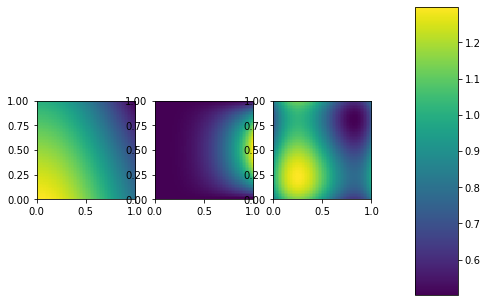

In [42]:
figures,ax = subplots( 1,3)
bounds=(freqp.max(),freqp.min(),freqp.max(),freqp.min())
stretch = (0, 1, 0, 1 )
ax[0].imshow( ap.real, extent=stretch ), \
ax[1].imshow( sol,extent=(0,1,0,1)), \
ax[2].imshow(cp.real, extent=stretch)

pos2=ax[2].imshow(cp.real, extent=stretch)

cax = axes([1, 0, 0.1,1])
colorbar(pos2,cax=cax)

show() 

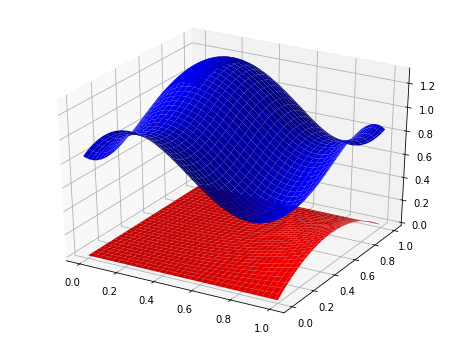

In [43]:
from mpl_toolkits import mplot3d
fig = figure(figsize=(8,6))
ax3d = axes(projection="3d")


ax3d.plot_surface(X.real , Y.real , cp.real,color='blue')
ax3d.plot_surface(X.real , Y.real , sol.real,color='red')

show()